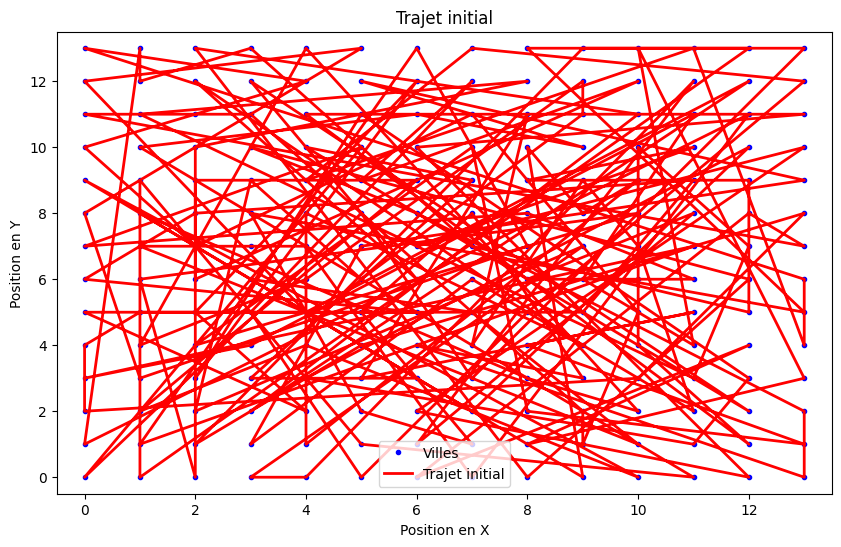

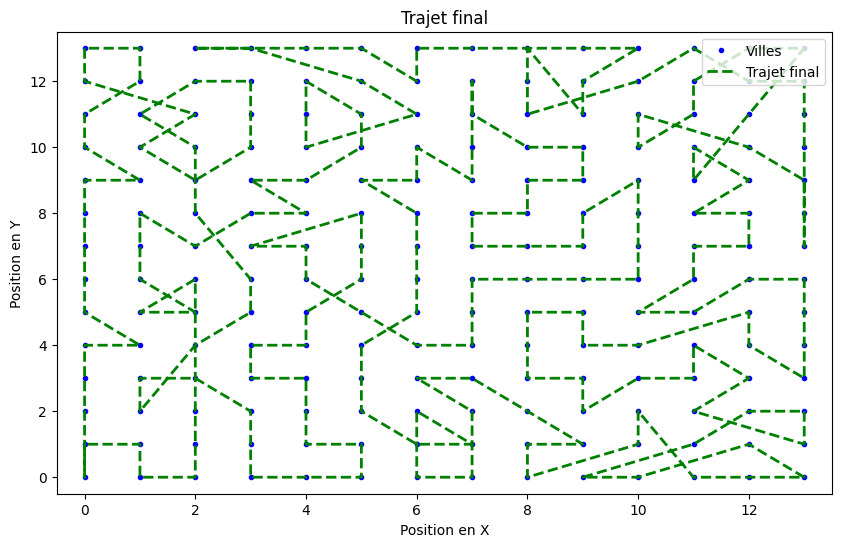

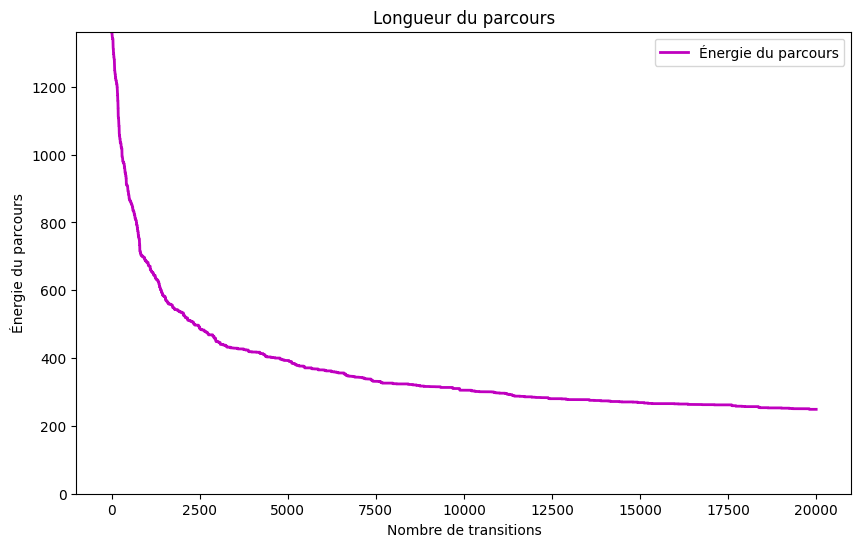

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# Ajustement de la taille de la figure
rcParams['figure.figsize'] = 10, 6  # Modification de la taille de la figure

# Paramètres du problème
N = 200  # Nombre de villes
c = 2.0  # Paramètre pour beta(t) = c * np.log(t)
Npas = int(2e4)

# Choix de la configuration
Configuration = "grid"

# Génération des positions des villes en fonction de la configuration choisie
if Configuration == "circle":
    Xvilles = np.cos((2 * np.pi / N) * np.arange(N))
    Yvilles = np.sin((2 * np.pi / N) * np.arange(N))
elif Configuration == "grid":
    M = int(round(np.sqrt(N)))
    N = M**2
    Xvilles = np.array(list(range(M)) * M)
    Yvilles = np.array([[j] * M for j in range(M)]).flatten()
elif Configuration == "approximategrid":
    r = 0.25
    M = int(round(np.sqrt(N)))
    N = M**2
    Xvilles = np.array(range(M) * M) + 0.0
    Xvilles += r * np.random.randn(N)
    Yvilles = np.array([[j] * M for j in range(M)]).flatten() + r * np.random.randn(N)
elif Configuration == "doublecircle":
    r = 0.5
    if N % 2 == 1:
        N += 1
    Xvilles = np.cos((2 * np.pi / N) * np.arange(N))
    Yvilles = np.sin((2 * np.pi / N) * np.arange(N))
    for k in range(N // 2):
        Xvilles[2 * k] *= r
        Yvilles[2 * k] *= r
elif Configuration == "randomsquare":
    Xvilles = np.random.rand(N)
    Yvilles = np.random.rand(N)
elif Configuration == "randomGaussian":
    Xvilles = np.random.randn(N)
    Yvilles = np.random.randn(N)
elif Configuration == "randomcauchy":
    Xvilles = np.tan(np.pi * np.random.rand(N) - 0.5 * np.pi)
    Yvilles = np.tan(np.pi * np.random.rand(N) - 0.5 * np.pi)
elif Configuration == "approximatecircle":
    r, R = 0.8, 1.2
    Xvilles = np.cos((2 * np.pi / N) * np.arange(N))
    Yvilles = np.sin((2 * np.pi / N) * np.arange(N))
    for k in range(N):
        rho = r + (R - r) * np.random.rand()
        Xvilles[k] *= rho
        Yvilles[k] *= rho
elif Configuration == "Ginibre":
    M = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    z = np.linalg.eigvals(M)
    Xvilles = np.array([k.real for k in z])
    Yvilles = np.array([k.imag for k in z])
# Définition des limites des axes
ax, bx = min(Xvilles) - 0.5, max(Xvilles) + 0.5
ay, by = min(Yvilles) - 0.5, max(Yvilles) + 0.5

# Tableau des positions des villes
Villes = np.array([Xvilles, Yvilles])

# Calcul des distances entre les villes
Distance = np.array([[np.linalg.norm(Villes[:, i] - Villes[:, j]) for j in range(N)] for i in range(N)])


def Energie(x):
    s = sum(Distance[x[i], x[i - 1]] for i in range(N))
    return s


def DeltaEnergie(x, i, k):
    return Distance[x[i - 1], x[k]] + Distance[x[i], x[(k + 1) % N]] - Distance[x[i - 1], x[i]] - Distance[x[k], x[(k + 1) % N]]


def transition(x, beta):
    (i, k) = np.sort(np.random.choice(N, size=2, replace=False))
    y = x.copy()
    if np.random.rand() < np.exp(-beta * DeltaEnergie(x, i, k)):
        for j in range(i, k + 1):
            y[j] = x[k + i - j]
    return y


x = np.random.permutation(N)

# Affichage du trajet initial
plt.figure()
plt.plot(Xvilles, Yvilles, "b.", label="Villes")
X_itineraire = [Xvilles[x[i]] for i in range(N)] + [Xvilles[x[0]]]
Y_itineraire = [Yvilles[x[i]] for i in range(N)] + [Yvilles[x[0]]]
plt.plot(X_itineraire, Y_itineraire, "r-", label="Trajet initial", linewidth=2)
plt.xlim((ax, bx))
plt.ylim((ay, by))
plt.title("Trajet initial")
plt.xlabel("Position en X")
plt.ylabel("Position en Y")
plt.legend()
plt.show()

Energies = [Energie(x)]

# Boucle principale de transition
for t in range(Npas):
    x = transition(x, c * np.log(t + 2))
    Energies.append(Energie(x))

# Affichage du trajet final
plt.figure()
plt.plot(Xvilles, Yvilles, "b.", label="Villes")
X_itineraire = [Xvilles[x[i]] for i in range(N)] + [Xvilles[x[0]]]
Y_itineraire = [Yvilles[x[i]] for i in range(N)] + [Yvilles[x[0]]]
plt.plot(X_itineraire, Y_itineraire, "g--", label="Trajet final", linewidth=2)
plt.xlim((ax, bx))
plt.ylim((ay, by))
plt.title("Trajet final")
plt.xlabel("Position en X")
plt.ylabel("Position en Y")
plt.legend()
plt.show()

# Affichage de l'évolution de l'énergie du trajet
plt.figure()
plt.plot(range(Npas + 1), Energies, "m-", label="Énergie du parcours", linewidth=2)
plt.title("Longueur du parcours")
plt.xlabel("Nombre de transitions")
plt.ylabel("Énergie du parcours")
plt.legend()
plt.ylim((0, max(Energies)))
plt.show()
